<img align="right" width="200" height="200" src="https://static.wikia.nocookie.net/lego/images/2/23/PPG_logo.png">

# <span style="color:#EF7C8E">Logistic regression & Linear Regression (Option 2)</span>
### <span style="color:#726060"> Sara Aldubaie</span>
<hr style="border:2px solid gray"> </hr>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.preprocessing import KBinsDiscretizer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import r2_score


In [2]:
df = sns.load_dataset("tips")

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [4]:
# Bin the tip column into 3 bins

binner = KBinsDiscretizer(
    n_bins = 3, # how many bins to create from continuous variable
    encode="ordinal", # how to encode 
    strategy="kmeans" # how to create the bins
)

# Create a new column with binned values
df["tips_groups"] = binner.fit_transform(df[["tip"]])


df.head()

,total_bill,tip,sex,smoker,day,time,size,tips_groups
0,16.99,1.01,Female,No,Sun,Dinner,2,0.0
1,10.34,1.66,Male,No,Sun,Dinner,3,0.0
2,21.01,3.50,Male,No,Sun,Dinner,3,1.0
3,23.68,3.31,Male,No,Sun,Dinner,2,1.0
4,24.59,3.61,Female,No,Sun,Dinner,4,1.0


In [5]:
#df['tips_groups'] = df['tips_groups'].replace(to_replace = 0.0,value = 'Bad Tipper')
#df['tips_groups'] = df['tips_groups'].replace(to_replace = 1.0,value = 'Good Tipper')
#df['tips_groups'] = df['tips_groups'].replace(to_replace = 2.0,value = 'Excellent Tipper')

#df.head(7)

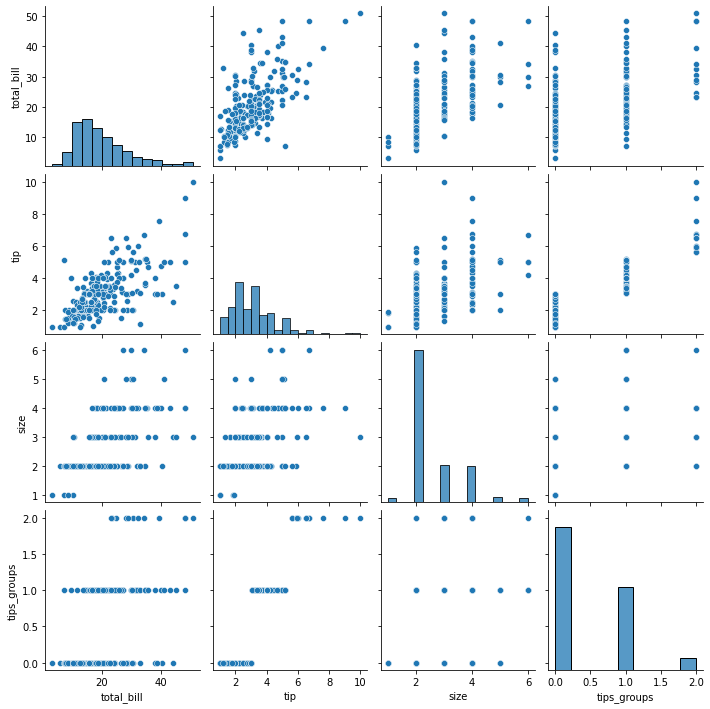

In [6]:
sns.pairplot(df)

In [7]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,total_bill,tip,size,tips_groups
total_bill,1.000000,0.675734,0.598315,0.553596
tip,0.675734,1.000000,0.489299,0.868589
size,0.598315,0.489299,1.000000,0.395980
tips_groups,0.553596,0.868589,0.395980,1.000000


In [8]:
df.describe(exclude="number")

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176



# <span style="color:#EF7C8E">One Hot Encoded</span>

In [9]:
# Create our One Hot Encoder object
one_hot = OneHotEncoder()

col_names = ['sex', 'smoker','day', 'time']

# One Hot encode the column
one_hot_df = one_hot.fit_transform(df[col_names]).toarray()

In [10]:
def col_names(one_hot_model):
    
    "Create columns names list for one hot encoded feature"
    
    column_names = []
    
    col_names = ['sex', 'smoker','day', 'time']

    for y in range(len(one_hot_model.categories_)):
        for z in range(len(one_hot_model.categories_[y])):
            # print(one_hot.categories_[y][z])
            column_names.append(col_names[y]+"_"+one_hot_model.categories_[y][z])
            
    return column_names

column_names = col_names(one_hot)

In [11]:
# Cast One Hot Encoded values into a dataframe

oh_df = pd.DataFrame(
    one_hot_df,
    index=df.index,
    columns = column_names
)

# <span style="color:#EF7C8E">Logistic regression</span>

In [12]:
df_new = df.merge(oh_df, on=df.index).set_index("key_0").drop(['sex', 'smoker','day', 'time', 'tip'], axis=1)

In [13]:
df_new.head()

,total_bill,size,tips_groups,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
key_0,,,,,,,,,,,,,
0,16.99,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,10.34,3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,21.01,3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,23.68,2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24.59,4,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [14]:
# Note: select all columns but the target 
X = df_new.loc[:, df_new.columns != 'tips_groups']
y = df_new.loc[:, 'tips_groups']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size = 0.80, 
                                                    random_state = 42)

# Standardize features by removing the mean and scaling to unit variance
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [15]:
test_dataset_log = pd.DataFrame(X_test, columns= ['total_bill' ,'size','sex_Female', 'sex_Male', 'smoker_No', 'smoker_Yes', 'day_Fri', 'day_Sat', 'day_Sun', 'day_Thur', 'time_Dinner', 'time_Lunch'])

test_dataset_log['Actual_tip'] = y_test.to_numpy()
test_dataset_log['Predict_tip'] = y_pred


In [16]:
test_dataset_log['Actual_tip'] = test_dataset_log['Actual_tip'].replace(to_replace = 0.0,value = 'Bad Tipper')
test_dataset_log['Actual_tip'] = test_dataset_log['Actual_tip'].replace(to_replace = 1.0,value = 'Good Tipper')
test_dataset_log['Actual_tip'] = test_dataset_log['Actual_tip'].replace(to_replace = 2.0,value = 'Excellent Tipper')
test_dataset_log['Predict_tip'] = test_dataset_log['Predict_tip'].replace(to_replace = 0.0,value = 'Bad Tipper')
test_dataset_log['Predict_tip'] = test_dataset_log['Predict_tip'].replace(to_replace = 1.0,value = 'Good Tipper')
test_dataset_log['Predict_tip'] = test_dataset_log['Predict_tip'].replace(to_replace = 2.0,value = 'Excellent Tipper')



In [17]:
pred_log = (test_dataset_log['Actual_tip'] == test_dataset_log['Predict_tip']).value_counts()
pred_log 

True     34
False    15
dtype: int64

In [18]:
test_dataset_log['Predict_tip'].value_counts()

Bad Tipper          37
Good Tipper         10
Excellent Tipper     2
Name: Predict_tip, dtype: int64

In [19]:
cm = confusion_matrix(y_test, y_pred)

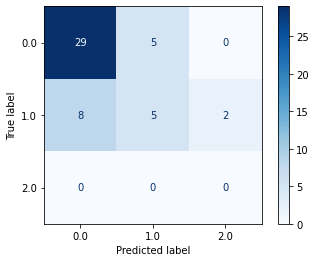

In [20]:
# NOTE: 
# 0 ---> Bad Tipper
# 1 ---> Good Tipper
# 2 ---> Excellent Tipper

plot_confusion_matrix(classifier, X=X_test, y_true=y_test, cmap='Blues')


In [22]:
def classification_score(y_true, y_predict):
    
    "Calculate classification Score Functions and print output"
    
    result_dict = {}
    
    recall =recall_score(y_true, y_predict, average = 'micro')
    precision  =precision_score(y_true, y_predict, average = 'micro')
    accuracy =accuracy_score(y_true, y_predict)
    
    ls = [recall, precision, accuracy]
    ls2 = ["Recall", "Precision", "Accuracy"]
    
    for x in range(len(ls)):
        #print(f"{ls2[x]}: {ls[x]}")
        result_dict[ls2[x]] = ls[x]
    
    return result_dict

classification_score(y_test, y_pred)

{'Recall': 0.6938775510204082,
 'Precision': 0.6938775510204082,
 'Accuracy': 0.6938775510204082}

# <span style="color:#EF7C8E">Linear Regression</span>

In [ ]:
df_lin = df.merge(oh_df, on=df.index).set_index("key_0").drop(['sex', 'smoker','day', 'time'], axis=1)

In [ ]:
df_lin.head()

In [ ]:
# Note: select all columns but the target 
X = df_lin.loc[:, df_lin.columns != 'tip']
y = df_lin.loc[:, 'tip']


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size = 0.80, 
                                                    random_state = 42)

multi_lr = LinearRegression()

multi_lr.fit(X_train, y_train)

multi_predictions = multi_lr.predict(X_test)


r2_score_4 = r2_score(y_true=y_test, y_pred=multi_predictions)

In [ ]:
test_dataset_lin = pd.DataFrame(X_test, columns= ['total_bill' ,'size','sex_Female', 'sex_Male', 'smoker_No', 'smoker_Yes', 'day_Fri', 'day_Sat', 'day_Sun', 'day_Thur', 'time_Dinner', 'time_Lunch'])

test_dataset_lin['Actual_tip'] = y_test.to_numpy()
test_dataset_lin['Predict_tip'] = multi_predictions

In [ ]:
test_dataset_lin.head()

In [ ]:
result_l = []
for ind in test_dataset_lin.index:
    tolerance = math.isclose(test_dataset_lin['Actual_tip'][ind], test_dataset_lin['Predict_tip'][ind], abs_tol = 0.10 * test_dataset_lin['Actual_tip'][ind])  
    result_l.append(tolerance)
    
test_dataset_lin['tolerance'] = result_l
pred_l = test_dataset_lin['tolerance'].value_counts()

In [ ]:
print('Linear Regression: ')
print(round((pred_l[False]/len(test_dataset_lin))*100, 2),'%')
print('--'*10)
print('Logistic Regression:')
print(round((pred_log[False]/len(test_dataset_log))*100,2),'%')

## <span style="color:#EF7C8E">The Result:  </span>


<span style="color:#726060">The Logistic Regression Model has a lower percentage of false prediction, so the Logistic Regression has a better performance than the Linear Regression </span>